<a href="https://colab.research.google.com/github/DitaAnatasya/google_colab/blob/main/2008107010060_Dita_Anatasya_Tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TUGAS 4 PRAKTIKUM VISUALISASI DATA
NAMA : DITA ANATASYA
NPM  : 2008107010060

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [ ]:
#membaca file data
data = pd.read_csv('data.csv')

1. EDA

In [ ]:
data.head()

,Date,Product,SalesCount,VisitsCount
0,31.01.2020,Product A,135,2420
1,29.02.2020,Product A,153,2502
2,31.03.2020,Product A,162,1074
3,30.04.2020,Product A,162,0
4,31.05.2020,Product A,128,0


In [ ]:
data.shape

(115, 4)

In [ ]:
data.rename(columns={'SalesCount':'Sales', 'VisitsCount':'Visits', 'Product':'Products'}, inplace=True)
data.head()

,Date,Products,Sales,Visits
0,31.01.2020,Product A,135,2420
1,29.02.2020,Product A,153,2502
2,31.03.2020,Product A,162,1074
3,30.04.2020,Product A,162,0
4,31.05.2020,Product A,128,0


In [ ]:
data.describe()

,Sales,Visits
count,115.000000,115.000000
mean,68519.069565,7567.886957
std,92801.885595,8466.343792
min,95.000000,0.000000
25%,787.500000,1966.000000
50%,31350.000000,3713.000000
75%,85517.500000,11357.000000
max,385528.000000,36734.000000


2. FILTERING

In [ ]:
# add total column
data ['Total'] = data .sum(axis=1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Products,Sales,Visits,Total
0,31.01.2020,Product A,135,2420,2555
1,29.02.2020,Product A,153,2502,2655
2,31.03.2020,Product A,162,1074,1236
3,30.04.2020,Product A,162,0,162
4,31.05.2020,Product A,128,0,128
...,...,...,...,...,...
110,31.07.2021,Product E,59336,3555,62891
111,31.08.2021,Product E,68809,4767,73576
112,30.09.2021,Product E,110873,7917,118790
113,31.10.2021,Product E,101955,7496,109451


In [ ]:
data[(data['Products']=='Product A') & (data['Sales']==128)]

,Date,Products,Sales,Visits,Total
4,31.05.2020,Product A,128,0,128


In [ ]:
dfilter = pd.DataFrame(data, columns=['Products', 'Visits'])
dfilter1 = dfilter.loc[(dfilter['Products'].notnull()) & (dfilter['Visits'] == 0)]
dfilter1

,Products,Visits
3,Product A,0
4,Product A,0
26,Product B,0
27,Product B,0
49,Product C,0
50,Product C,0
72,Product D,0
73,Product D,0
95,Product E,0
96,Product E,0


In [ ]:
dKolom = pd.DataFrame(data, columns=['Products', 'Visits', 'Sales'])
dfilter2 = dKolom.loc[(data['Visits'] != 0)]
dDuplicates = dfilter2.drop_duplicates(subset = 'Products')
dDuplicates

,Products,Visits,Sales
0,Product A,2420,135
23,Product B,279,105
46,Product C,15834,45963
69,Product D,23606,385528
92,Product E,4873,105540


In [ ]:
#mengubah index data
dDuplicates .set_index('Products', inplace=True)
dDuplicates .head()

,Visits,Sales
Products,,
Product A,2420,135
Product B,279,105
Product C,15834,45963
Product D,23606,385528
Product E,4873,105540


In [ ]:
# add total column
dDuplicates ['Total'] = dDuplicates .sum(axis=1)
dDuplicates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Visits,Sales,Total
Products,,,
Product A,2420,135,2555
Product B,279,105,384
Product C,15834,45963,61797
Product D,23606,385528,409134
Product E,4873,105540,110413


3. WAFFLE CHART

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
newdata = dDuplicates .loc[['Product C', 'Product D', 'Product E'],:]
newdata

,Visits,Sales,Total
Products,,,
Product C,15834,45963,61797
Product D,23606,385528,409134
Product E,4873,105540,110413


In [ ]:
# compute the proportion of each category with respect to the total
total_values = newdata['Total'].sum()
category_proportions = newdata['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Products,
Product C,0.106300
Product D,0.703773
Product E,0.189927


In [ ]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [ ]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Products,
Product C,43
Product D,282
Product E,76


In [ ]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print ('Waffle chart populated!')

Waffle chart populated!


In [ ]:
waffle_chart

array([[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 

<Figure size 432x288 with 0 Axes>

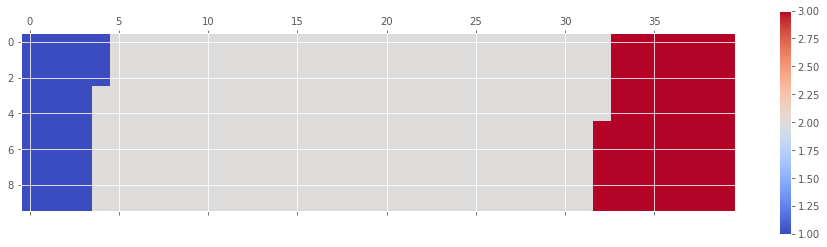

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

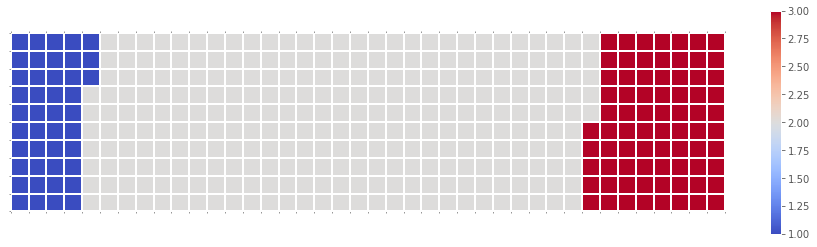

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 432x288 with 0 Axes>

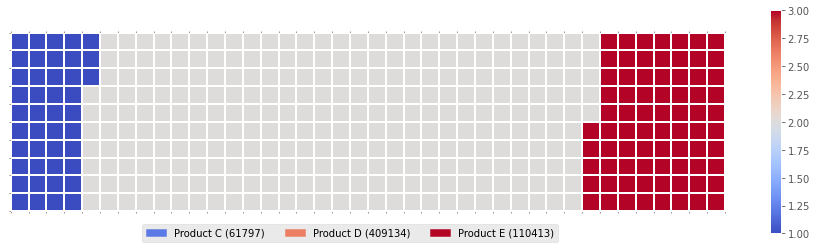

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(newdata['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(newdata.index.values):
    label_str = category + ' (' + str(newdata['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(newdata.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

4. WORD CLOUDS

In [ ]:
# install wordcloud
!pip3 install wordcloud==1.8.1

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [ ]:
import urllib

# open the file and read it into a variable frozen
keongmas = urllib.request.urlopen('https://raw.githubusercontent.com/DitaAnatasya/prakvisdat/main/keongmas.txt').read().decode("utf-8")

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
keongmas_wc = WordCloud(
    background_color='white',
    max_words=2000, #took 2000 words on first teks
    stopwords=stopwords
)

# generate the word cloud
keongmas_wc.generate(keongmas)

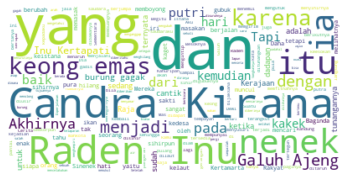

In [ ]:
# display the word cloud
plt.imshow(keongmas_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

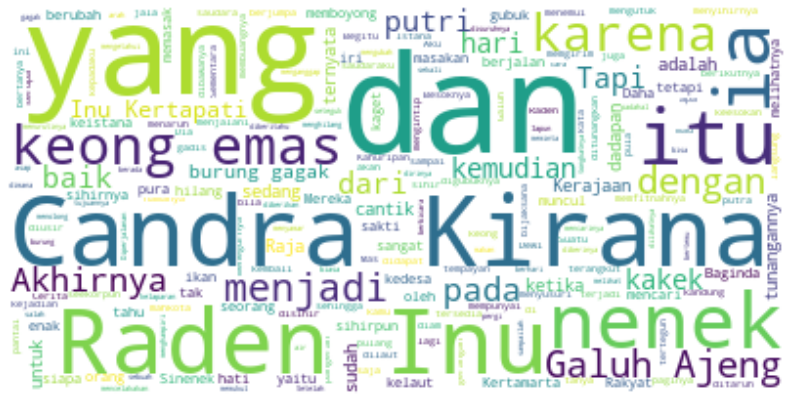

In [ ]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(keongmas_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

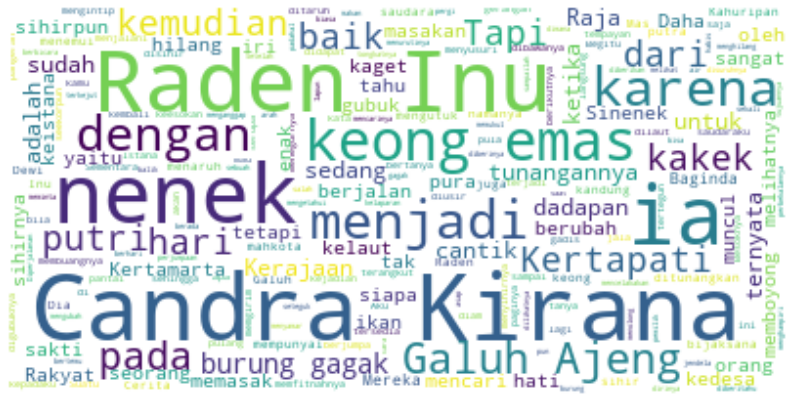

In [ ]:
stopwords.add('itu') # add the words said to stopwords
stopwords.add('dan')
stopwords.add('akhirnya')
stopwords.add('yang')

# re-generate the word cloud
keongmas_wc.generate(keongmas)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(keongmas_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
keongmas_mask = np.array(Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/DitaAnatasya/prakvisdat/main/snail.jpg')))

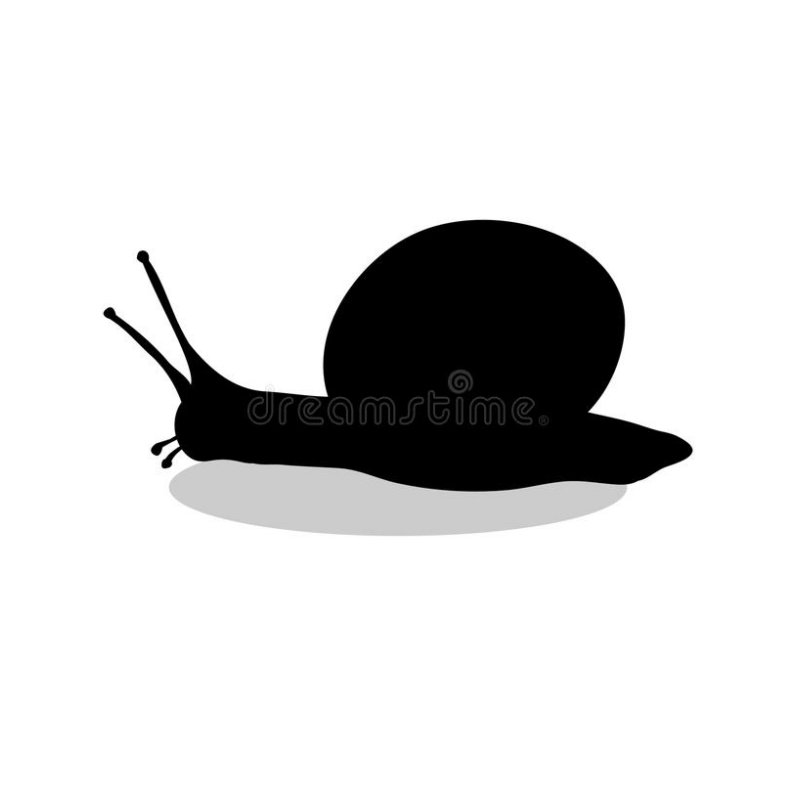

In [ ]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(keongmas_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

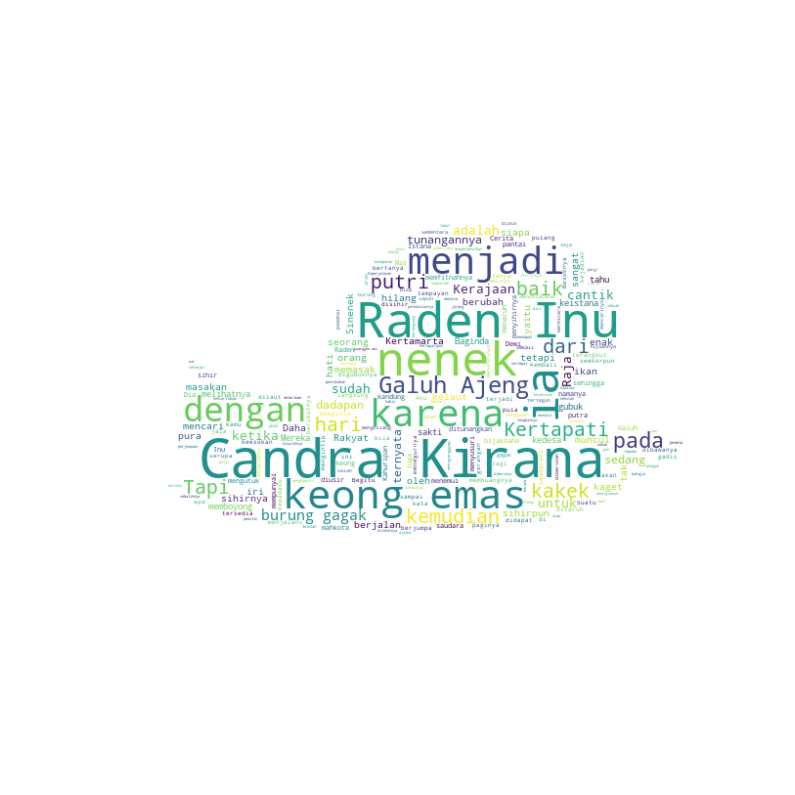

In [ ]:
# instantiate a word cloud object
keongmas_wc = WordCloud(background_color='white', max_words=2000, mask=keongmas_mask, stopwords=stopwords)

# generate the word cloud
keongmas_wc.generate(keongmas)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(keongmas_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

5. SEABORN AND REGGRESION PLOT

In [ ]:
import seaborn as sns

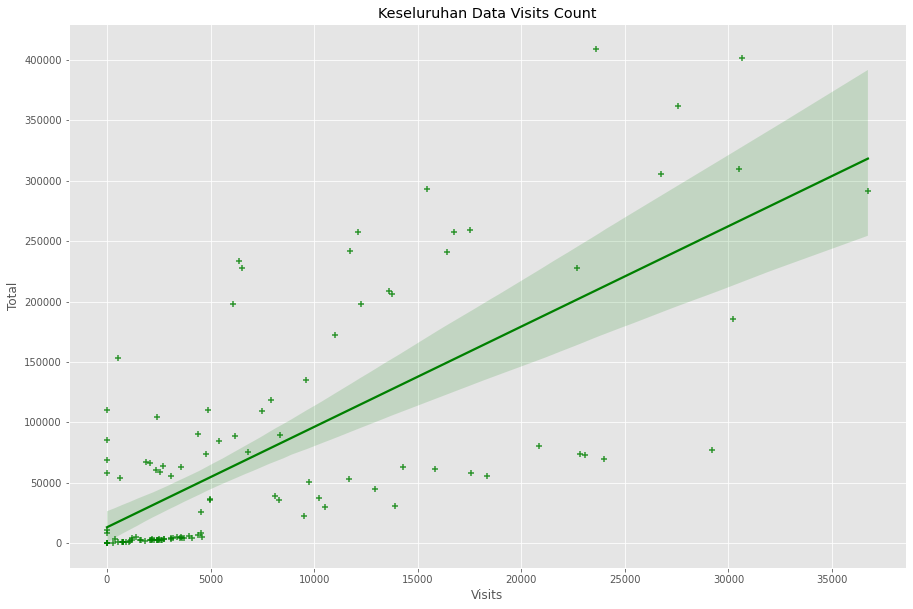

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x='Visits', y='Total', data=data, color='green', marker='+')
plt.title('Keseluruhan Data Visits Count')

plt.show()


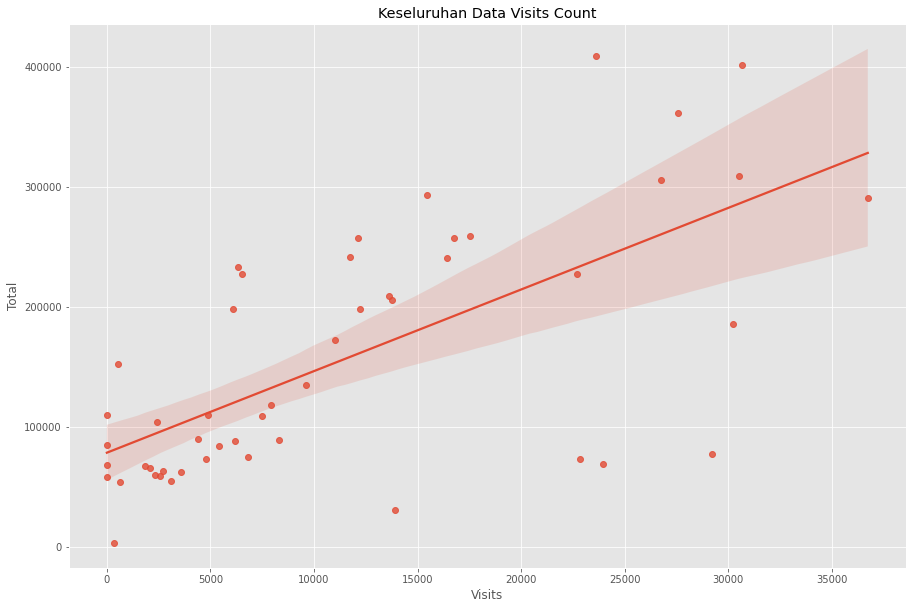

In [ ]:
data50 = data.tail(50)
plt.figure(figsize=(15, 10))
sns.regplot(x='Visits', y='Total', data=data50)
plt.title('Keseluruhan Data Visits Count')

plt.show()